In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# Lectura de datos
data = pd.read_csv('regLin.csv')
data.shape

(1029, 2)

In [3]:
# Visualización de datos en tabla
data.head(5)

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144


In [4]:
# Acomodar los datos por x para ver si se alcanza a distinguir un patrón
data.sort(columns=['X'], ascending=True, inplace=True)
data.head(15)

,X,y
566,0.030369,-0.412562
196,0.100954,0.541283
625,0.308973,0.195142
939,0.579291,2.229578
105,0.597898,1.557561
724,0.755877,4.036580
294,0.829009,4.963450
860,0.888350,5.715770
504,0.951385,-1.732150
135,0.954427,6.760574


In [6]:
# División en datos de prueba y datos de entrenamiento
x_trn, x_tst, y_trn, y_tst = train_test_split([[d] for d in data.X],data.y, train_size=0.75)
# train_test_split([[d] for d in df['X']],df['y'], train_size=0.75)

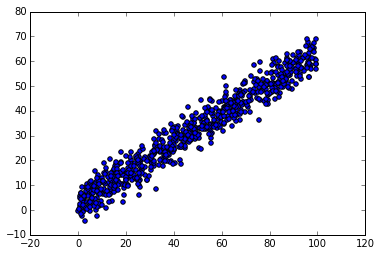

In [7]:
# Visualización de datos de forma gráficos
plt.scatter(x_trn,y_trn)

In [134]:
# Estandarización de datos
scaleX = StandardScaler()
scaleY = StandardScaler()
scaleX.fit(x_trn)
x_trn = scaleX.transform(x_trn)
scaleY.fit(y_trn)
y_trn = scaleY.transform(y_trn)
scaleX = StandardScaler()
scaleY = StandardScaler()
scaleX.fit(x_tst)
x_tst = scaleX.transform(x_tst)
scaleY.fit(y_tst)
y_tst = scaleY.transform(y_tst)

In [ ]:
# De forma manual
x_trn2 = (x_trn-np.mean(x_trn))/np.std(x_trn)
y_trn2 = (y_trn-np.mean(y_trn))/np.std(y_trn)
print x_trn2[:5],y_trn2[:5]

In [9]:
# Otra forma de hacer la regresión
def ols_H(x,y):
    x1 = np.concatenate((np.ones((len(x),1)),np.array(x)), axis = 1)
    y1 = np.array(y)
    beta = np.dot(np.dot(np.linalg.inv(np.dot(x1.T,x1)),x1.T),y1)
    beta = beta.reshape((2,1))
    del x1, y1
    return beta

In [10]:
# Cálculo de los estimadores con los datos de entrenamiento
ols_H(x_trn,y_trn)

array([[ -1.19695920e-16],
       [  9.74920428e-01]])

In [11]:
# Cálculo con sklearn
ols_dyn = LinearRegression(normalize = True)
ols_dyn.fit(x_trn,y_trn)
b0 = ols_dyn.intercept_
b1 = ols_dyn.coef_
err_sk = ols_dyn.residues_
print b0, b1, err_sk

-7.96060161539e-17 [ 0.97492043] 38.1877523163


In [12]:
# Función de salida
#Esta fn calcula las y's que estima la regresión
def y_gorro(x,b):
    y = (np.dot(np.concatenate
                ((np.ones((len(x),1)),np.array(x).reshape(len(x),1)),axis=1),
                np.array(b).reshape(len(b),1)))
    return y

In [20]:
# Ahora se define una fn que vaya recalculando el error conforme tenga nuevos datos
def trainer_ols(x,y,eta=.1):
    y = np.array(y).reshape(len(y),1)
    # la inicio, arbitrariamente, en 1
    x = np.array(x).reshape(len(x),1)
    b = [1,1]
    err = pd.DataFrame(np.zeros((len(x),3)),columns = ['Errores','w1','w2'], index = [x])
    for j in xrange(len(x)):
        # cálculo del error INCLUYENDO LOS VALORES ANTERIORES (por eso los dos puntos(:))
        V = y[j]-y_gorro(x[:j+1],b)[j]
        # uso las betas arbitrarias
        b_ant = np.array([i for i in b])
        # almaceno los datos en la tabla
        err.ix[j] = [V[0], b[0], b[1]]
        x_new = [1,x[j]]
        for k in xrange(len(b)):
            ## y_gorro lo calculo solo con los valores que se supone tengo hasta ese momento
            b[k] = (b[k]+eta*(V)*x_new[k])
    return err

In [22]:
# Probamos la fn
trainer_ols(x_trn,y_trn)

,Errores,w1,w2
1.337183,-0.846554,1.000000,1.000000
-0.236710,-0.702101,0.915345,0.886800
1.741088,-0.807216,0.845135,0.903420
1.071701,-0.537068,0.764413,0.762876
0.431813,-0.556610,0.710706,0.705319
-1.260522,-1.499970,0.655045,0.681284
0.946039,-0.293521,0.505048,0.870358
1.684661,-0.436710,0.475696,0.842590
0.567448,-0.228846,0.432025,0.769019
-0.606863,-0.651390,0.409140,0.756033


In [19]:
# ¿Con qué w's da errores pequeños? Comparación con los que nos arrojaba la regresión
print ols_H(x_trn,y_trn)
trainer_ols(x_trn,y_trn)[['Errores','w1','w2']].loc[
    np.logical_and(trainer_ols(x_trn,y_trn).Errores<.05,trainer_ols(x_trn,y_trn).Errores>-.05)]

[[ -1.19695920e-16]
 [  9.74920428e-01]]


,Errores,w1,w2
-0.276791,-0.031914,0.408473,1.001835
0.707434,0.010556,0.339724,0.995851
-0.243956,-0.033003,0.331481,0.992860
-0.451165,-0.032612,0.275099,0.991401
-1.189382,-0.026851,0.247441,0.976446
1.378244,0.002483,0.210823,0.974879
-1.495174,0.042229,0.200941,0.983020
-1.557970,0.017419,0.182196,0.989898
-0.908145,-0.018828,0.168823,0.985709
1.717124,-0.033778,0.151059,0.978883


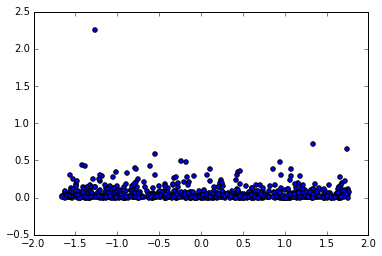

In [24]:
plt.scatter(trainer_ols(x_trn,y_trn)['w1']+trainer_ols(x_trn,y_trn)['w2']*x_trn,[n for n in trainer_ols(x_trn,y_trn).index])

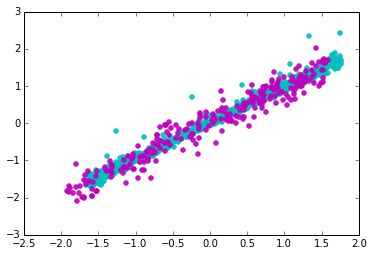

In [167]:
# ¿Cómo se ven los que se predijeron y los de los 
plt.scatter(trainer_ols(x_trn,y_trn).index.values,trainer_ols(x_trn,y_trn)['w1'].values.reshape(771,1)
         +np.prod([trainer_ols(x_trn,y_trn).index.values,trainer_ols(x_trn,y_trn)['w2'].values.reshape(771,1)],axis=0),
            color='c',alpha = .9)
plt.hold(True)
plt.scatter(x_tst, y_tst, color = 'm', alpha = .9)